In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [58]:
# Abrimos la carpeta donde se encuentran las bases de datos
os.chdir(r"C:/Users\s1248850/OneDrive - Syngenta/Documents/Rosario Luque/Ciencias de datos/TP/TP3")
#os.chdir(r"c:\Users\s1290226\OneDrive - Syngenta\Desktop\UdeSA\Ciencia de datos\CC408-T2-3\TP4")
#os.chdir(r"C:\Users\clari\OneDrive\Documents\Tutoriales CD\CC408-T2-3\TP4")
#os.chdir(r"c:\Users\Teresa\Desktop\Cuarto año\Semestre de primavera\Ciencia de Datos\CC408-T2-3\TP4")

# Guardamos las bases de datos en en dos variables
ind_2004 = pd.read_stata("Individual_t104.dta")
hogar_2004 = pd.read_stata("Hogar_t104.dta")
ind_2024 = pd.read_excel("usu_individual_T124.xlsx")
hogar_2024 = pd.read_excel("usu_hogar_T124.xlsx")

In [59]:
ind_2004.shape, hogar_2004.shape, ind_2024.shape, hogar_2024.shape

((45289, 176), (12816, 88), (46050, 177), (16104, 88))

In [60]:
hogar_2024.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

2. Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente. La base de hogares se llama Hogar_t104.dta y usu_hogar_T124.xls, respectivamente. Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.

Para poder trabajar con las cuatro bases de datos es necesario primero pasar el nombre de todas las columnas a minúscula. Esto nos permitirá luego concatenar las bases de datos en una sola y preservar la estructura de la información.

In [61]:
# En la base de datos del 2024 los nombres de las columnas están en mayúsculas.
# Entonces, cambiamos los nombres de las columnas a minúsculas.
ind_2024.columns = ind_2024.columns.str.lower()
hogar_2024.columns = hogar_2024.columns.str.lower()

#Just in case, hacemos lo mismo para las bases del 2004.
ind_2004.columns = ind_2004.columns.str.lower()
hogar_2004.columns = hogar_2004.columns.str.lower()

Ahora eliminamos todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unimos ambos trimestres de hogares e individuos en una sola base.

In [62]:
# Contar el número de filas en el dataframe ind_2004 que son 'Ciudad de Buenos Aires' o 'Partidos del GBA' en la columna "aglomerado"
count_32_33 = ind_2004[ind_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2004 es: {count_32_33}")
# Contar el número de filas en el dataframe ind_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2024 es: {count_32_33_2024}")
# Contar el número de filas en el dataframe hogar_2004 que son 'Ciudad de Buenos Aires' o 'Partidos del GBA' en la columna "aglomerado"
count_32_33_hogar = hogar_2004[hogar_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2004 es: {count_32_33_hogar}")
# Contar el número de filas en el dataframe hogar_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33_hogar_2024 = hogar_2024[hogar_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2024 es: {count_32_33_hogar_2024}")


El número de filas con aglomerado 32 y 33 para el año 2004 es: 7647
El número de filas con aglomerado 32 y 33 para el año 2024 es: 7051
El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2004 es: 2351
El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2024 es: 2545


In [63]:
# Primero filtramos los aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
ind_2004 = ind_2004[ind_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
ind_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])]
hogar_2004 = hogar_2004[hogar_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
hogar_2024 = hogar_2024[hogar_2024['aglomerado'].isin([32, 33])]

Antes de unir las bases de datos, vamos a quedarnos con las variables que usamos en el TP3 y vamos a reorganizar las variables. Seguramente tengamos que hacer esto con las bases de hogares, lo iremos haciendo al paso.

In [64]:
# Primero hacemos el recorte de variables de interés de la base de individuos en función de lo realizado en el tp3.
ind_2004 = ind_2004[['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
ind_2024 = ind_2024[['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
print(ind_2004.columns)
print(ind_2024.columns)

Index(['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08',
       'nivel_ed', 'estado', 'cat_inac', 'ipcf'],
      dtype='object')
Index(['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08',
       'nivel_ed', 'estado', 'cat_inac', 'ipcf'],
      dtype='object')


In [65]:
# Ahora ajustamos las variables de la base de invididuos del 2004 para que tengan el mismo formato que las de 2024.
# Se convierte a numérico los valores de ch06 (edades) de los datos de 2004, convirtiendo en na los valores que no son numeros.
ind_2004['ch06'] = pd.to_numeric(ind_2004['ch06'], errors='coerce')
# Ahora convertimos las variables de 2004 al formato numérico de 2024, para facilitar posteriormente el análisis.
#ch04=genero
ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
#ch07= estado civil
ind_2004['ch07'] = ind_2004['ch07'].replace({'Unido': 1, 'Casado': 2,'Separado o divorciado':3, 'Viudo':4,'Ns./Nr.':0,'Soltero':5})
#ch08= estado de salud
mapeosalud = {'Obra social (incluye PAMI)': 1,'No paga ni le descuentan': 2,'Mutual/Prepaga/Servicio de emergencia': 3,'Obra social y mutual/prepaga/servicio de emergencia': 12,'Planes y seguros públicos': 3,'Ns./Nr.': 9,  'Obra social, mutual/prepaga/servicio de emergencia y planes': 123,'Obra social y planes y seguros públicos': 13,'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23}
ind_2004['ch08'] = ind_2004['ch08'].map(mapeosalud)
ind_2004['ch08'] = pd.to_numeric(ind_2004['ch08'], errors='coerce')
#nivel_ed= nivel educativo
mapeonivel = {'Primaria Incompleta (incluye educación especial)': 1,'Primaria Completa': 2,'Secundaria Incompleta': 3,'Secundaria Completa': 4,'Superior Universitaria Incompleta': 5,'Superior Universitaria Completa': 6,'Sin instrucción': 7,'Ns./ Nr.': 9  }
ind_2004['nivel_ed'] = ind_2004['nivel_ed'].map(mapeonivel)
ind_2004['nivel_ed'] = pd.to_numeric(ind_2004['nivel_ed'], errors='coerce')
#estado = estado laboral
mapeoestado = {'Entrevista individual no realizada (no respuesta al cuestion': 0,'Ocupado': 1,'Desocupado': 2,'Inactivo': 3,'Menor de 10 años': 4}
ind_2004['estado'] = ind_2004['estado'].map(mapeoestado)
ind_2004['estado'] = pd.to_numeric(ind_2004['estado'], errors='coerce')
#cat_inac= categoría de inactividad
mapeoinac = {'Jubilado / Pensionado': 1,'Rentista': 2,'Estudiante': 3,'Ama de casa': 4,'Menor de 6 años': 5,'Discapacitado': 6,'Otros': 7,0.0:0}
ind_2004['cat_inac'] = ind_2004['cat_inac'].map(mapeoinac)
ind_2004['cat_inac'] = pd.to_numeric(ind_2004['cat_inac'], errors='coerce')

C:\Users\s1248850\AppData\Local\Temp\ipykernel_67492\1007163427.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\s1248850\AppData\Local\Temp\ipykernel_67492\1007163427.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\s1248850\AppData\Local\Temp\ipykernel_67492\1007163427.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [66]:
# Ahora chequeamos si hay nulls en la base de datos de 2004
print(ind_2004.isnull().sum())
# Y si hay nulls en la base de datos de 2024
print(ind_2024.isnull().sum())
#Hay 135 valores faltantes para la variable ch06 en la base de datos de 2004.
#Hay 668 valores faltantes para la variable cat_inac en la base de datos de 2004.
#No hay valores faltantes en la base de datos de 2024.

codusu         0
nro_hogar      0
ano4           0
ch04           0
ch06         135
ch07           0
ch08           0
nivel_ed       0
estado         0
cat_inac     668
ipcf           0
dtype: int64
codusu       0
nro_hogar    0
ano4         0
ch04         0
ch06         0
ch07         0
ch08         0
nivel_ed     0
estado       0
cat_inac     0
ipcf         0
dtype: int64


In [67]:
# Chequeamos si hay valores negativos de IPCF en la base de datos de 2004.
print((ind_2004['ipcf']<0).sum())
print((ind_2024['ipcf']<0).sum())

0
0


In [68]:
# Chequeamos si hay valores negativos en edad (ch06)
print((ind_2004['ch06']<0).sum())
print((ind_2024['ch06']<0).sum())
#Hay 51 valores negativos de edad en la base del 2024.

0
51


In [69]:
#Eliminamos los valores de edad que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['ch06'] > 0]
ind_2004 = ind_2004[ind_2004['ch06'] > 0]

In [70]:
#Eliminamos los valores faltantes de la base de datos de 2004.
ind_2004 = ind_2004.dropna()
#Chequeamos que no haya valores faltantes en la base de datos de 2004.
print(ind_2004.isnull().sum())
#Chequeamos que no haya valores faltantes en la base de datos de 2024.
print(ind_2024.isnull().sum())

codusu       0
nro_hogar    0
ano4         0
ch04         0
ch06         0
ch07         0
ch08         0
nivel_ed     0
estado       0
cat_inac     0
ipcf         0
dtype: int64
codusu       0
nro_hogar    0
ano4         0
ch04         0
ch06         0
ch07         0
ch08         0
nivel_ed     0
estado       0
cat_inac     0
ipcf         0
dtype: int64


In [71]:
# Reportar las columnas con valores faltantes para la base de hogares del 2004.
missing_values = hogar_2024.isnull().sum()
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("Columnas con valores faltantes y su cantidad de NAs:")
    print(missing_columns)
else:
    print("No hay columnas con valores faltantes.")

Columnas con valores faltantes y su cantidad de NAs:
iv1_esp    2541
iv3_esp    2543
iv7_esp    2540
ii7_esp    2538
ii8_esp    2448
idecifr    2545
pdecifr    2545
ideccfr    2545
pdeccfr    2545
dtype: int64


In [72]:
# Reportar las columnas con valores faltantes para la base de hogares del 2024.
missing_values_2024 = hogar_2024.isnull().sum()
missing_columns_2024 = missing_values_2024[missing_values_2024 > 0]
if not missing_columns_2024.empty:
    print("Columnas con valores faltantes y su cantidad de NAs:")
    print(missing_columns_2024)
else:
    print("No hay columnas con valores faltantes.")

Columnas con valores faltantes y su cantidad de NAs:
iv1_esp    2541
iv3_esp    2543
iv7_esp    2540
ii7_esp    2538
ii8_esp    2448
idecifr    2545
pdecifr    2545
ideccfr    2545
pdeccfr    2545
dtype: int64


In [73]:
# Dado que en el 2024, hay muchas variables con muchos nas, vamos a quedarnos solo con aquellas que vamos a usar para el análisis.
# Según el análisis del diseño del registro, aquellas variables que podrían constribuir a la mejora de la predicción son:
# 'ITF', 'V4', 'IX_Tot', 'IX_Men10', 'V5' e 'II7'. Por lo tanto, nos quedamos con esas variables.
hogar_2004 = hogar_2004[['codusu', 'nro_hogar', 'ano4', 'itf', 'ix_men10', 'v4', 'ix_tot', 'v5', 'ii7']]
hogar_2024 = hogar_2024[['codusu', 'nro_hogar', 'ano4', 'itf', 'ix_men10', 'v4', 'ix_tot', 'v5', 'ii7']]

In [74]:
# Dado que la base de datos de hogares del 2004 tiene la descripción como valor en vez del valor numérico, vamos a cambiarlo.
#itf= ingreso total familiar
hogar_2004['itf'] = pd.to_numeric(hogar_2004['itf'], errors='coerce')
#ix_men10= cantidad de menores de 10 años
hogar_2004['ix_men10'] = pd.to_numeric(hogar_2004['ix_men10'], errors='coerce')
#v4= en los últimos tres meses, las personas de este hogar han vivido de seguro de desempleo
hogar_2004['v4'] = hogar_2004['v4'].replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 0, 0.0:0})
hogar_2004['v4'] = pd.to_numeric(hogar_2004['v4'], errors='coerce')
#ix_tot= cantidad total de integrantes del hogar
hogar_2004['ix_tot'] = pd.to_numeric(hogar_2004['ix_tot'], errors='coerce')
#v5= en los últimos tres meses, las personas de este hogar han vivido de subsidio o ayuda social.
hogar_2004['v5'] = hogar_2004['v5'].replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 0, 0.0:0})
hogar_2004['v5'] = pd.to_numeric(hogar_2004['v5'], errors='coerce')
mapeo_ii7 = {'Otra situación':9, 'Propietario de la vivienda y el terreno':1, 'Inquilino/arrendatario de la vivienda':3, 'Ocupante por pago de impuestos/expensas':4, 'Propietario de la vivienda solamente':2, 'Ocupante gratuito (con permiso)':6, 'Ocupante en relación de dependencia':5, 'Ocupante de hecho (sin permiso)':7, 'Está en sucesión':8,0.0:0}
hogar_2004['ii7'] = hogar_2004['ii7'].map(mapeo_ii7)

C:\Users\s1248850\AppData\Local\Temp\ipykernel_67492\796976883.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hogar_2004['v4'] = hogar_2004['v4'].replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 0, 0.0:0})
C:\Users\s1248850\AppData\Local\Temp\ipykernel_67492\796976883.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hogar_2004['v4'] = hogar_2004['v4'].replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 0, 0.0:0})
C:\Users\s1248850\AppData\Local\Temp\ipykernel_67492\796976883.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

In [75]:
#Nuevamente chequeo el número de nas para las variables seleccionadas.
print(hogar_2004.isnull().sum())
print(hogar_2024.isnull().sum())

codusu          0
nro_hogar       0
ano4            0
itf             0
ix_men10     1576
v4              0
ix_tot          0
v5              0
ii7             0
dtype: int64
codusu       0
nro_hogar    0
ano4         0
itf          0
ix_men10     0
v4           0
ix_tot       0
v5           0
ii7          0
dtype: int64


In [76]:
# Elimino los valores faltantes de la base de datos de hogares del 2004.
hogar_2004 = hogar_2004.dropna()

In [77]:
#Chequeo que las variables itf, ix_men10, e ix_tot no tengan valores negativos.
print((hogar_2004['itf']<0).sum())
print((hogar_2004['ix_men10']<0).sum())
print((hogar_2004['ix_tot']<0).sum())

0
0
0


In [78]:
#Chequeo que las variables itf, ix_men10, e ix_tot no tengan valores negativos.
print((hogar_2024['itf']<0).sum())
print((hogar_2024['ix_men10']<0).sum())
print((hogar_2024['ix_tot']<0).sum())

0
0
0


Ahora sí, una vez eliminados los valores faltantes y los valores sin sentido, además de transformar las variables, procedemos a unir las bases de datos.

In [79]:
# Verificar las claves en todas las bases
claves = ["codusu", "nro_hogar"]
for df, name in zip([ind_2004, hogar_2004, ind_2024, hogar_2024],
                    ["individual_2004", "hogar_2004", "individual_2024", "hogar_2024"]):
    if not all(clave in df.columns for clave in claves):
        raise ValueError(f"Faltan claves en la base {name}")

# Unir las bases individuales y de hogar para cada año
base_2004 = pd.merge(ind_2004, hogar_2004, on=claves, how="inner")
base_2024 = pd.merge(ind_2024, hogar_2024, on=claves, how="inner")

# Agregar columna de año
base_2004["Año"] = 2004
base_2024["Año"] = 2024

# Combinar ambas bases en un solo DataFrame
base_final = pd.concat([base_2004, base_2024], ignore_index=True)

In [80]:
base_final.shape


(10479, 19)

3. Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones.

In [81]:
# Check for missing values in base_final
missing_values_base_final = base_final.isnull().sum()
missing_columns_base_final = missing_values_base_final[missing_values_base_final > 0]

if not missing_columns_base_final.empty:
    print("Columnas con valores faltantes y su cantidad de NAs:")
    print(missing_columns_base_final)
else:
    print("No hay columnas con valores faltantes en base_final.")

No hay columnas con valores faltantes en base_final.


In [82]:
base_final.to_excel("base_final.xlsx", index=False)

4. Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [83]:
# Primero, vamos a crear las variables que utilizamos en el tp3 para la predicción del desempleo.
# La columna PEA (Población Económicamente Activa) que toma 1 si están ocupados o desocupados en ESTADO.
base_final['PEA'] = base_final['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

In [84]:
# La columna PET (Población en Edad para Trabajar) toma 1 si están la persona tiene entre 15 y 65 años cumplidos. 
base_final['PET'] = base_final['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

In [85]:
# Agregamos una columna llamada desocupado que tome 1 si esta desocupada
base_final['desocupado'] = base_final['estado'].apply(lambda x: 1 if x == 2 else 0)


In [86]:
# Ahora vamos a crear una nueva columna que contenga la proporción de personas que trabajan en el hogar.
# Para esto, vamos a dividir la cantidad de personas ocupadas en el hogar por la cantidad total de personas en el hogar.
base_final['prop_ocupados'] = base_final['PEA'] / base_final['ix_tot']

# Ahora vamos a crear una nueva columna que contenga la proporción de personas que reciben subsidio o ayuda social en el hogar.
# Para esto, vamos a dividir la cantidad de personas que reciben subsidio o ayuda social en el hogar por la cantidad total de personas en el hogar.
base_final['prop_subsidio'] = base_final['v5'] / base_final['ix_tot']

# Ahora vamos a crear una nueva columna que contenga la proporción de personas que viven de seguro de desempleo en el hogar.
# Para esto, vamos a dividir la cantidad de personas que viven de seguro de desempleo en el hogar por la cantidad total de personas en el hogar.
base_final['prop_desempleo'] = base_final['v4'] / base_final['ix_tot']

5. Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

                itf      ix_men10            v4        ix_tot            v5  \
count  1.047900e+04  10479.000000  10479.000000  10479.000000  10479.000000   
mean   3.032779e+05      0.949900      2.013742      4.266915      1.860006   
std    9.128569e+05      1.059893      0.353590      2.127193      0.509279   
min    0.000000e+00      0.000000      1.000000      1.000000      1.000000   
25%    0.000000e+00      0.000000      2.000000      3.000000      2.000000   
50%    1.080000e+03      1.000000      2.000000      4.000000      2.000000   
75%    3.800000e+05      2.000000      2.000000      5.000000      2.000000   
max    3.393700e+07      7.000000      9.000000     15.000000      9.000000   

                ii7  
count  10479.000000  
mean       2.007443  
std        1.648931  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        3.000000  
max        9.000000  


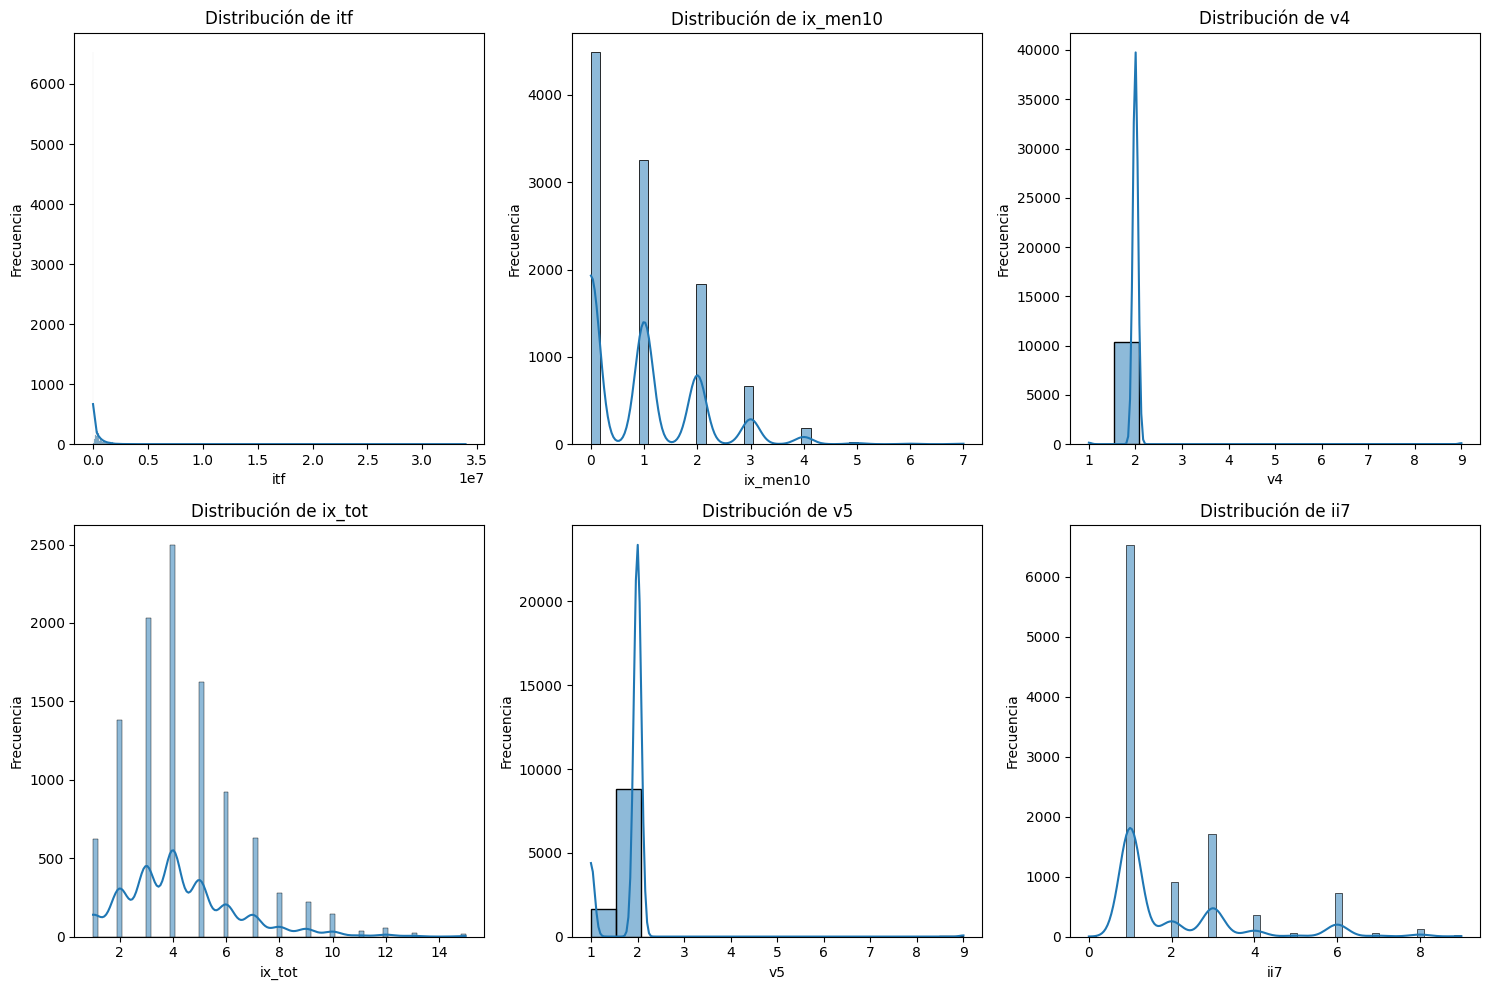

In [87]:
# Análisis descriptivo de las variables provenientes de las bases de hogares
variables_hogar = ['itf', 'ix_men10', 'v4', 'ix_tot', 'v5', 'ii7']

# Estadísticas descriptivas
descriptive_stats = base_final[variables_hogar].describe()
print(descriptive_stats)

# Visualización de la distribución de las variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(variables_hogar):
    sns.histplot(base_final[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Parte II: Clasificación y regularización

1. Para cada año, partan la base respondieron en una base de prueba y una de entrenamiento (X_train, y_train, X_test, y_test) utilizando
el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state
instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

Antes de hacer esto, sería importante considerar el feedback que nos dejó Nacho.
Parte II:
#### Creo que, si bien hicieron unas variables que tienen sentido ordinal, para los modelos hubiera creado dummies para las variables categóricas. Es más seguro.
- Habría que preguntarle si crear dummies para absolutamente todas las variables categóricas que tiene la base final.
#### Hay algún problema con la convergencia de la regresión logística, no termino de entender por qué.
- Si ahora la parte de preprocesamiento de datos está bien, esto no debería volver a pasar. 
#### Me gustan mucho las figuras de ROC de todos los modelos juntos, pero por algún motivo que no comprendo les dieron valores de Accuracy y AUC bastante peores que sus compañeras. Igual se los consideré bien porque los modelos están bien hechos (salvo el tema de las dummies).
- Idem al anterior
#### Definitivamente no hubiera utilizado la variable PEA para el entrenamiento de los modelos. Piensen que para crearla utilizaron la variable estado.
- Tener en mente la posibilidad de sacar las variables madres de otras variables que creemos. Si podemos pensar entre todas que variables que podamos crear nos evitaría tener tantas variables categóricas, como en el caso de PEA, nos ahorraría tiempo.
#### Sacar la variable estado de la base final

In [88]:
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



In [89]:
# Agregamos una columna llamada desocupado a las bases de cada año y que tome 1 si esta desocupada
base_2004['desocupado'] = base_2004['estado'].apply(lambda x: 1 if x == 2 else 0)
base_2024['desocupado'] = base_2024['estado'].apply(lambda x: 1 if x == 2 else 0)


In [90]:
# Entrenaremos con el 70% de la base de datos del 2004 y el resto se usarán para testear 
# el modelo obtenido
# Split the data into training and testing sets
train2004, test2004 = train_test_split(base_2004, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_train_2004 = train2004['desocupado']
X_train_2004 = train2004.drop(columns=['desocupado'])

y_test_2004 = test2004['desocupado']
X_test_2004 = test2004.drop(columns=['desocupado'])

# Add a column of ones to X_train and X_test
X_train_2004 = X_train_2004.assign(intercept=1)
X_test_2004 = X_test_2004.assign(intercept=1)

# Repito lo mismo para el 2024
train2024, test2024 = train_test_split(base_2024, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_test_2024 = test2024['desocupado']
X_test_2024 = test2024.drop(columns=['desocupado'])

y_train_2024 = train2024['desocupado']
X_train_2024 = train2024.drop(columns=['desocupado'])

In [91]:
# Revisamos cuantas observaciones quedaron para Test y cuantas para Entrenamiento.
print(f'El conjunto de entrenamiento del 2004 tiene {len(X_train_2004)} observaciones.')
print(f'El conjunto de test del 2004 tiene {len(X_test_2004)} observaciones.')
print(f'El conjunto de entrenamiento del 2024 tiene {len(X_train_2024)} observaciones.')
print(f'El conjunto de test del 2024 tiene {len(X_test_2024)} observaciones.')

El conjunto de entrenamiento del 2004 tiene 2435 observaciones.
El conjunto de test del 2004 tiene 1044 observaciones.
El conjunto de entrenamiento del 2024 tiene 4900 observaciones.
El conjunto de test del 2024 tiene 2100 observaciones.


Expliquen brevemente cómo elegirían λ por validación cruzada (en Python es alpha). Detallen por qué no usarían el conjunto de prueba (test) para su elección

En validación cruzada, ¿cuáles son las implicancias de usar un k muy
pequeño o uno muy grande? Cuando k = n (con n el número de
muestras), ¿cuántas veces se estima el modelo?

Para regresión logística, implementen la penalidad, L1 como la de
LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando
la opción penalty y reporten la matriz de confusión, la curva ROC, los
valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron los
resultados con respecto al TP3? ¿La performance de regresión logística
con regularización es mejor o peor?

In [92]:
#antes de hacer la regresión, necesitamos estandarizar las variables
# Estadisticas antes de estandarizar, base 2004
X_train_2004.describe().T

,count,mean,std,min,25%,50%,75%,max
nro_hogar,2435.0,1.037372,0.196099,1.0,1.0,1.0,1.0,3.0
ano4_x,2435.0,2004.000000,0.000000,2004.0,2004.0,2004.0,2004.0,2004.0
ch06,2435.0,21.766324,15.896854,1.0,8.0,20.0,33.0,88.0
ch08,2435.0,1.744969,1.169776,1.0,1.0,2.0,2.0,23.0
nivel_ed,2435.0,3.426283,2.169437,1.0,1.0,3.0,5.0,7.0
estado,2435.0,2.548665,1.265006,0.0,1.0,3.0,4.0,4.0
cat_inac,2435.0,2.299795,2.083029,0.0,0.0,3.0,4.0,7.0
ipcf,2435.0,243.479790,314.730579,0.0,87.5,161.5,300.0,4800.0
ano4_y,2435.0,2004.000000,0.000000,2004.0,2004.0,2004.0,2004.0,2004.0
itf,2435.0,1136.220123,1226.573110,0.0,450.0,830.0,1422.5,19200.0


In [116]:
#voy a transformar la columna "codusu" en 0 porque es string y cuando corro la standarización me da error
X_train_2024['codusu'] = 0
X_test_2024['codusu'] = 0

In [117]:
# Estadisticas antes de estandarizar
X_train_2024.describe().T


,count,mean,std,min,25%,50%,75%,max
codusu,4900.0,0.000000,0.000000e+00,0.0,0.0,0.00,0.0,0.00
nro_hogar,4900.0,1.019388,7.216307e-01,1.0,1.0,1.00,1.0,51.00
ano4_x,4900.0,2024.000000,0.000000e+00,2024.0,2024.0,2024.00,2024.0,2024.00
ch04,4900.0,1.527755,4.992800e-01,1.0,1.0,2.00,2.0,2.00
ch06,4900.0,38.341837,2.290298e+01,1.0,19.0,37.00,56.0,97.00
ch07,4900.0,3.438367,1.667894e+00,1.0,2.0,4.00,5.0,9.00
ch08,4900.0,2.145306,1.913443e+00,1.0,1.0,1.00,4.0,23.00
nivel_ed,4900.0,3.818163,1.722596e+00,1.0,3.0,4.00,5.0,7.00
estado,4900.0,2.136327,1.137867e+00,0.0,1.0,2.00,3.0,4.00
cat_inac,4900.0,1.592653,1.950967e+00,0.0,0.0,0.00,3.0,7.00


In [118]:
#primero para 2004
#  Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_2004_transformed = pd.DataFrame(sc.fit_transform(X_train_2004), index=X_train_2004.index, columns=X_train_2004.columns)

# Estandarizamos las observaciones de test
X_test_2004_transformed = pd.DataFrame(sc.transform(X_test_2004), index=X_test_2004.index, columns=X_test_2004.columns)

# Estadisticas luego de estandarizar
X_test_2004_transformed.describe().T


,count,mean,std,min,25%,50%,75%,max
codusu,1044.0,-0.027714,0.989524,-1.763105e+00,-8.787657e-01,-0.090725,0.889561,1.709348
nro_hogar,1044.0,1.030651,0.177927,1.000000e+00,1.000000e+00,1.000000,1.000000,3.000000
ano4_x,1044.0,2004.000000,0.000000,2.004000e+03,2.004000e+03,2004.000000,2004.000000,2004.000000
ch04,1044.0,1.502874,0.500231,1.000000e+00,1.000000e+00,2.000000,2.000000,2.000000
ch06,1044.0,22.189655,16.240122,1.000000e+00,7.000000e+00,20.000000,34.000000,74.000000
ch07,1044.0,3.565134,1.654353,1.000000e+00,2.000000e+00,5.000000,5.000000,5.000000
ch08,1044.0,1.793103,1.502095,1.000000e+00,1.000000e+00,2.000000,2.000000,23.000000
nivel_ed,1044.0,3.480843,2.194436,1.000000e+00,2.000000e+00,3.000000,6.000000,7.000000
estado,1044.0,2.503831,1.274796,1.000000e+00,1.000000e+00,3.000000,4.000000,4.000000
cat_inac,1044.0,2.246169,2.115036,-1.896726e-17,-1.896726e-17,3.000000,4.000000,7.000000


In [119]:
#ahora para 2024
#  Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_2024_transformed = pd.DataFrame(sc.fit_transform(X_train_2024), index=X_train_2024.index, columns=X_train_2024.columns)

# Estandarizamos las observaciones de test
X_test_2024_transformed = pd.DataFrame(sc.transform(X_test_2024), index=X_test_2024.index, columns=X_test_2024.columns)

# Estadisticas luego de estandarizar
X_test_2024_transformed.describe().T


,count,mean,std,min,25%,50%,75%,max
codusu,2100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nro_hogar,2100.0,0.017347,1.517584,-0.026869,-0.026869,-0.026869,-0.026869,69.267724
ano4_x,2100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ch04,2100.0,-0.041288,1.001681,-1.057140,-1.057140,0.945948,0.945948,0.945948
ch06,2100.0,-0.027320,0.968329,-1.630602,-0.844598,-0.102261,0.727410,2.474087
ch07,2100.0,-0.012441,1.007236,-1.462093,-0.862473,0.336766,0.936386,3.334864
ch08,2100.0,0.028587,1.028144,-0.598619,-0.598619,-0.598619,0.969395,5.150766
nivel_ed,2100.0,-0.006951,0.987960,-1.636165,-0.475008,0.105570,0.686149,1.847306
estado,2100.0,-0.031091,0.986194,-1.877676,-0.998748,-0.119821,0.759106,1.638033
cat_inac,2100.0,-0.012833,0.999102,-0.816423,-0.816423,-0.816423,0.721432,2.771906


Ahora si, comenzamos con las regresiones

In [121]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
# Ridge para 2004
# prueba con alpha = 1
alpha = 1
print("Alpha:", alpha)

ridge_a1_2004 = Ridge(alpha = alpha)
ridge_a1_2004.fit(X_train_2004_transformed, y_train_2004)             
pred_a1_2004 = ridge_a1_2004.predict(X_test_2004_transformed)
ecm_a1_2004 = mean_squared_error(y_test_2004, pred_a1_2004)

print("Error cuadrático medio: ", ecm_a1_2004)   
print("Coeficientes del modelo:")
print(pd.Series(ridge_a1_2004.coef_, index = X_train_2004_transformed.columns)) 

Alpha: 1
Error cuadrático medio:  1871.480565703701
Coeficientes del modelo:
codusu      -0.002504
nro_hogar    0.000291
ano4_x       0.000000
ch04         0.022290
ch06         0.062028
ch07        -0.007452
ch08         0.000555
nivel_ed     0.055805
estado       0.269899
cat_inac    -0.283547
ipcf        -0.000166
ano4_y       0.000000
itf         -0.025551
ix_men10    -0.015409
v4          -0.011967
ix_tot       0.026080
v5          -0.013218
ii7          0.002406
Año          0.000000
intercept    0.000000
dtype: float64


In [122]:
# prueba con alpha = 1
alpha = 5
print("Alpha:", alpha)

ridge_a5_2004 = Ridge(alpha = alpha)
ridge_a5_2004.fit(X_train_2004_transformed, y_train_2004)             
pred_a5_2004 = ridge_a5_2004.predict(X_test_2004_transformed)
ecm_a5_2004 = mean_squared_error(y_test_2004, pred_a5_2004)

print("Error cuadrático medio: ", ecm_a5_2004)   
print("Coeficientes del modelo:")
print(pd.Series(ridge_a5_2004.coef_, index = X_train_2004_transformed.columns)) 

Alpha: 5
Error cuadrático medio:  1752.6522538168508
Coeficientes del modelo:
codusu      -0.002524
nro_hogar    0.000206
ano4_x       0.000000
ch04         0.022263
ch06         0.060157
ch07        -0.006838
ch08         0.000641
nivel_ed     0.054493
estado       0.262248
cat_inac    -0.277354
ipcf        -0.001069
ano4_y       0.000000
itf         -0.024527
ix_men10    -0.014992
v4          -0.011956
ix_tot       0.025174
v5          -0.013184
ii7          0.002327
Año          0.000000
intercept    0.000000
dtype: float64
